<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>

# Graphs and Matrices 2: Solving some Probabilistic Models


## Table of contents

- [Model 1: The Frog](#frog)
- [Model 2: Opinion propagation among sheeps](#Sheeps)
- [Model 3: OK Corral](#Corral)
- [Bonus: The birthday paradox](#birthday)


In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *


<!--<div markdown=1 class="Rmk"> Here is the Latex code of a matrix that you can copy/paste throughout the notebook:
$$
M=
\begin{matrix}
v_1 \\ v_2 \\ v_3 
\end{matrix}
\begin{pmatrix}
1 & 1 & 0\\
0 & 0 & 1\\
0 & 1 & 0\\
\end{pmatrix}.
$$-->


<a id="frog"></a>
## Model 1: The frog riddle <font size='-0.5'>(or how to become a trader?)</font>

This is a maths puzzle which used to be asked in job interviews (to be hired as a quantitative analyst or trader).

Here is the puzzle: a frog starts from the bank of a river located at $x=0$. The other bank is located at $x=10$. It first jumps uniformly at random in $\{1,2,\dots,10\}$ (if it jumps at $10$ the frog has crossed the river and the process is over). Then, at each time step, if it is located at some $y<10$ then it jumps at a uniform location in $\{y+1,\dots,10\}$.

<img src="figures/Grenouille.jpg" style="width: 700px;"/>


The questions we ask are
* What is the probability distribution of the total number of steps  before reaching the bank?
* What is the average number of steps before reaching bank?</i>


<div markdown=1 class="DoIt"> 
For $n\geq 0$ let $X_n\in\{0,1,\dots, 10\}$ be the location of the frog at time $n$. Let also $T$ be the random variable given by the number of steps needed to reach the other bank. Namely,
$$
T=\min \{n\geq 0\text{ such that }X_n=10\}. 
$$

1. Write a script which computes the matrix $Q=(Q_{i,j})_{0\leq i,j \leq 10} $ associated to the Markov chain $(X_n)_n$. 
2. Write a function `DistributionFrog(i,n)` which computes the probability that the frog is at location `i` at time `n` (<i>i.e.</i>  $\mathbb{P}(X_n=i)$).
3. Write $\mathbb{P}(T=t)$ as a function of $\mathbb{P}(X_n=i)$ for some well chosen $n$'s and $i$'s.. Plot the distribution $t\mapsto \mathbb{P}(T=t)$. What is the more likely value for $T$?

<div markdown=1 class="Answers">

1. Let $L=10$. Starting from a given $i$ the frog jumps at $i< j\leq L$ with probability $1/(L-i)$. Therefore
$$
Q_{i,j}=
\begin{cases}
\frac{1}{L-i} & \text{ for j>i},\\
0 & \text{ otherwise.}
\end{cases}
$$

2. By the course formula we have $\mathbb{P}(X_n=i)=(Q^n)_{0,i}$.

3. We have
$$
\mathbb{P}(T=t)=\mathbb{P}(X_t=10)-\mathbb{P}(X_{t-1}=10).
$$

[0.0, 0.0, 0.011111111111111112, 0.02361111111111111, 0.037896825396825394, 0.054563492063492064, 0.07456349206349207, 0.09956349206349208, 0.1328968253968254, 0.1828968253968254, 0.38289682539682535]


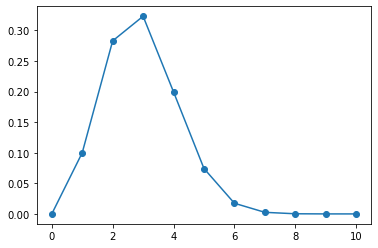

In [5]:
# Question 1
def MatrixFrog(L):
    # L = length of the river (L=10 in the exercise)
    # returns the transition matrix of the location of the frog
    Matrix=np.zeros([L+1,L+1])
    Matrix[L,L]=1 # absorbing state
    for i in range(L):
        for j in range(i+1,L+1):
            Matrix[i,j]=1/(L-i)  
    return Matrix

#print(MatrixFrog(4))

# Question 2
def DistributionFrog(L,i,n):
    # L = length of the river (L=10 in the exercise)
    # 0 <= i <= L : location of the frog
    # n : time step
    Power_of_M=np.linalg.matrix_power(MatrixFrog(L),n)
    return Power_of_M[0,i]
    
print([DistributionFrog(10,i,2) for i in range(11)])

# Question 3

def DistributionT(L,t):
    if t==0:
        return 0
    return DistributionFrog(L,L,t)-DistributionFrog(L,L,t-1)

plt.plot([DistributionT(10,t) for t in range(11)],'o-')
plt.show()

<div markdown=1 class="DoIt"> 

Question 4. Write a script which computes an approximation of $\mathbb{E}[T]$.

<div markdown=1 class="Answers"> By definition of expectation
$$
\mathbb{E}[T]=\sum_{t=1}^{10}t\mathbb{P}(T=t).
$$
According to the script below we have $\mathbb{E}[T]\approx 2.92897...$

In [8]:


Distrib=[DistributionT(10,t) for t in range(11)]
print('The expectation is:')
print(sum([i*Distrib[i] for i in range(11)]))


The expectation is:
2.928968253968253


<a id='Sheeps'></a>
## Model 2. Opinion propagation among sheeps

<img src="figures/SheepsMacWindows.jpg" style="width: 450px;"/>

Let $N>1$ be fixed and consider a population of $N$ sheeps, either pro-Mac or pro-Windows.<br>

Initially, $0\leq m\leq N$ sheeps are pro-Mac. At times $t= 0,1,2,...,$ a randomly and uniformly chosen sheep bleats its opinion and instantly one sheep of the other camp switches its opinion. The process ends when unanimity is reached.<br>

We will ask:
* what can we say about the number of pro-Mac sheeps at a given time?
* what is the probability that unanimity is reached for pro-Mac?

<div markdown=1 class="DoIt"> 

1. Let $M_k\in\{0,1,\dots,N\}$ be the number of pro-Mac sheeps at time $k$. Find the transition matrix $Q=(Q_{i,j})_{0\leq i,j \leq N} $ associated to this Markov chain $(M_k)_k$.
2. Using $Q$, write a function `ProbaSheeps(N,m,i,t)` which computes the probability that starting from $m$, there are exactly $i$ pro-Mac sheeps at time $t$.
3. Draw a plot of $i\mapsto $ `ProbaSheeps(N,m,i,t)` for $N=100, m=70, t=30$.

<div markdown=1 class="Answers"> Question 1). Observe that $M_k=0$ and $M_k=N$ are absorbing states. If there are $0<i<N$ pro-Mac sheeps at a given time $k$, then 

* With prob. $i/N$ a pro-Mac sheep is chosen and $M_{k+1} \hookrightarrow M_k+1$
* With prob. $(N-i)/N$ a pro-Windows sheep is chosen and $M_{k+1} \hookrightarrow M_k-1$

Therefore we have
$$
Q= \begin{matrix}
0 \\ 1 \\ \vdots \\ i \\ \vdots  \\ N-1 \\ N
\end{matrix}
\begin{pmatrix}
1 & 0   & 0 & 0   & 0  & 0 & 0\\
(N-1)/N & 0 & 1/N & 0 & 0  & 0 & 0\\
 &  & \ddots &  &   & & \\
0 & 0 & (N-i)/N & 0 & i/N  & 0 & 0\\
 &  &  &  & \ddots  &  & \\
0 & 0 & 0 & 0 & 1/N & 0 & (N-1)/N\\
0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}.
$$
Question 2) According to the formula that we saw in the course we have
$$
\text{ProbaSheeps(N,m,i,t)}= \left(Q^t \right)_{m,i},
$$
where $Q$ is the above matrix.

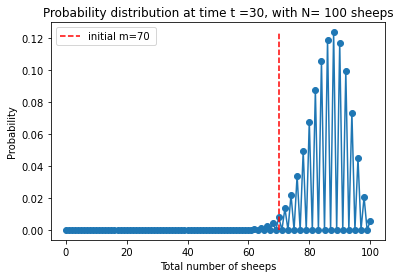

In [10]:

def MatrixSheeps(N):
    # returns the transition matrix of the pro-Mac sheeps
    Matrix=np.zeros([N+1,N+1])
    Matrix[N,N]=1 # absorbing state
    Matrix[0,0]=1 # absorbing state
    for k in range(1,N):
        Matrix[k,k+1]=k/N  
        Matrix[k,k-1]=(N-k)/N
    return Matrix

def ProbaSheeps(N,m,i,t):
    # returns the probability that there are i pro-Max sheeps (among N) at time t
    #         when the process starts with m pro-Mac sheeps
    MatrixQ=MatrixSheeps(N)
    Power=np.linalg.matrix_power(MatrixQ,t)
    return Power[m,i]
    
N=100
m=70
t=30
Probabilities=[ProbaSheeps(N,m,i,t) for i in range(N+1)]
top=max(Probabilities)

plt.plot(Probabilities,'o-')
plt.plot([m,m],[0,top],'r--',label='initial m='+str(m)+' ')

plt.title('Probability distribution at time t ='+str(t)+', with N= '+str(N)+' sheeps')
plt.xlabel('Total number of sheeps'),plt.ylabel('Probability'),plt.legend()

plt.legend()
plt.show()

#print(Probabilities[-1])


As $0$ and $N$ are absorbing states the processus is eventually absorbed at $0$ or $N$: there is unanimity pro-Mac or pro-Windows among sheeps.

For fixed $N$ let $p_{m}$ denote the probability that the unanimity is achieved for Mac, starting from $m$ pro-Mac and $N-m$ pro-Windows sheeps. 

<div markdown=1 class="DoIt"> 

1. Assume that the Markov chain $(M_k)$ starts at $M_0=m$. Explain why 
$$
p_m = \lim_{k\to +\infty} \mathbb{P}(M_k = N).
$$<br>
(Hint: If you want to write a rigourous proof you may use Proposition 1.3 in the Lecture Notes of MAA203 or <a href="https://en.wikipedia.org/wiki/Measure_(mathematics)#Continuity_from_below">this link (Wikipedia)</a>.)
2. Use your function `ProbaSheeps(N,m,i,t)` to plot $m\mapsto p_{m}$ for $N=20$. (We consider that $k=N^2$ is large enough for the previous approximation to hold.)

<div markdown=1 class="Answers"> 
1. We have designed the Markov chain $(M_k)$ such that
$$
\mathbb{P}(M_k = N)=\mathbb{P}(\text{ Unanimity reached for Mac before time }k).
$$
The sequence of events on the right-hand side in nondecreasing in the sense that
$$
\bigg\{\text{ Unanimity reached for Mac before time }k\bigg\}
\subset \bigg\{\text{ Unanimity reached for Mac before time }k+1\bigg\}
$$
Therefore if we use Proposition 1.3 in Giovanni's Lecture Notes of MAA203 (or <a href="https://en.wikipedia.org/wiki/Measure_(mathematics)#Continuity_from_below">this link (Wikipedia)</a>) then we obtain
\begin{align*}
\lim_{k\to +\infty} \mathbb{P}(M_k = N)&=\mathbb{P}(\cup_k \text{ Unanimity reached for Mac before time }k)\\
&=\mathbb{P}(\text{ Unanimity is eventually reached for Mac})\\
&=p_m.
\end{align*}

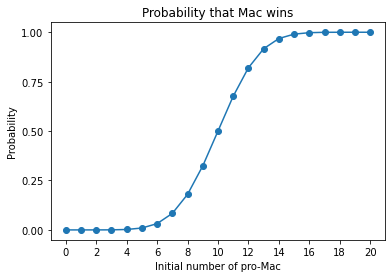

In [17]:
# Question 2

N=20
Probabilities_proMac=[ProbaSheeps(N,m,N,N**2) for m in range(N+1)]

plt.plot(Probabilities_proMac,'o-')

plt.xlabel('Initial number of pro-Mac'),plt.ylabel('Probability')
plt.title('Probability that Mac wins')
plt.xticks(range(0,22,2))
plt.yticks(np.arange(0,1.1,0.25))

plt.show()
#print(Probabilities_proMac)

<a id="Corral"></a>

## Model 3. OK Corral

We consider the following probabilistic model. <i>(Its name refers to <a href='https://en.wikipedia.org/wiki/Gunfight_at_the_O.K._Corral'>this historical event</a>.)</i><br>

Initially there is a  population of $N$ gangsters, $a$ of them belong to gang $A$ and $b=N-a$ belong to gang $B$. At times $t= 0,1,2,...,$ a randomly and uniformly chosen gangster (among survivors) kills a member of the other gang. The process ends when one of the gangs is wiped out.

We want to find:
* The probability that the gang $A$ wins (depending on $a,b$)
* The expected number of survivors of gang $A$ at the end of the gunfight.



<div markdown=1 class="DoIt"> Let $p(i,j)$ be the probability that Gang $A$ wins the gunfight against gang $B$, starting from respectively $i,j$ gangsters. 

1. Find $p(i,j)$ when $i$ or $j$ equals $0$.
2. For $i\geq 1$ and $j\geq 1$ write $p(i,j)$ as a function of $p(i,j-1)$ and $p(i-1,j)$.
3. Write a function which computes $p(i,j)$ and draw a plot of $i\mapsto p(i,b)$ for fixed $b=8$ and $1\leq i\leq 2b$. Is this consistent with intuition?

<div markdown=1 class="Answers"> 

1. Clearly we have the initial conditions
$$
p(i,0)=1,\qquad p(0,j)=0.
$$
2. Starting from $i,j$ individuals we have that
\begin{align*}
\mathbb{P}(A\text{ wins})=&\mathbb{P}(A\text{ wins}\ |\ \text{First gangster belongs to }A)\times \mathbb{P}(\text{First gangster belongs to }A)\\
&+\mathbb{P}(A\text{ wins}\ |\ \text{First gangster belongs to }B)\times \mathbb{P}(\text{First gangster belongs to }B)\\
=& p(i,j-1)\frac{i}{i+j}+ p(i-1,j)\frac{j}{i+j}.
\end{align*}



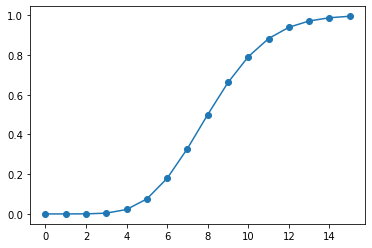

In [10]:
def GangA_wins(a,b):
    # return the probability that gang A wins starting from a,b individuals
    if b==0:
        return 1
    elif a==0:
        return 0
    else:
        return GangA_wins(a,b-1)*a/(a+b) + GangA_wins(a-1,b)*b/(a+b)

N=8
Results=[GangA_wins(n,N) for n in range(2*N)]
plt.plot(Results,'o-')
plt.show()


<div markdown=1 class="DoIt"> Let $e(i,j)$ be the expected numbers of survivors of Gang $A$ after the gunfight starting from respectively $i,j$ gangsters. 

1. State a recursive formula for the $e(i,j)$.
2. Write a function which computes $e(i,j)$ and draw a plot of $i\mapsto e(i,b)$ for fixed $b=8$ and $1\leq a\leq 20$.

<div markdown=1 class="Answers"> 
Starting from $i,j$ individuals we have that
\begin{align*}
e(i,j)=&\mathbb{E}[\text{ survivors}\ |\ \text{First gangster belongs to }A]\times \mathbb{P}(\text{First gangster belongs to }A)\\
&+\mathbb{E}[\text{ survivors}\ |\ \text{First gangster belongs to }B]\times \mathbb{P}(\text{First gangster belongs to }B)\\
=& e(i,j-1)\frac{i}{i+j}+ e(i-1,j)\frac{j}{i+j}.
\end{align*}

Besides we have the initial conditions
$$
e(i,0)=i,\qquad e(0,j)=0.
$$

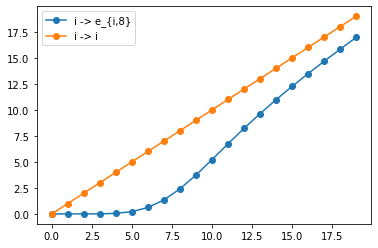

In [9]:
def ExpectedSurvivorsA(a,b):
    # return the number of survivals of gang A, starting from a,b individuals
    if b==0:
        return a
    elif a==0:
        return 0
    else:
        return ExpectedSurvivorsA(a,b-1)*a/(a+b) + ExpectedSurvivorsA(a-1,b)*b/(a+b)

N=8
b_max=20
plt.plot([ExpectedSurvivorsA(i,N) for i in range(b_max)],'o-',label='i -> e_{i,8}')
plt.plot([i for i in range(b_max)],'o-',label='i -> i')
plt.legend()
plt.show()


<a id="birthday"></a>
## **Bonus** The birthday paradox
 
We consider the following problem. Consider a group of $n\geq 2$ people, we assume that their birthdays $X_1,\dots,X_n$ are uniformly distributed and independent in $\{1,2,\dots,k\}$, with $k=365$. The <i>birthday paradox</i> asks for the probability of the event

$$
E_{n,k} =\{ \text{ there exist }i\neq j, 1\leq i,j \leq n; X_i=X_j\}.
$$

Obviously we have that $\mathbb{P}(E_{n,365})=1$ as soon as $n\geq 365$. The so-called <i>paradox</i> is that a high probability is reached for quite small values of $n$.

<div markdown=1 class="DoIt"> Let $F_{n,k}$ be the complementary event of $E_{n,k}$.

1. Compute $\mathbb{P}(F_{1,k})$ and $\mathbb{P}(F_{2,k})$.
2. Compute
$$
\mathbb{P}(F_{n,k}|\ F_{n-1,k}),
$$
and deduce the formulas for $\mathbb{P}(F_{n,k}), \mathbb{P}(E_{n,k})$.

<div markdown=1 class="Answers"> 
1. We obviously have $\mathbb{P}(F_{1,k})=1$.

One writes
\begin{align*}
\mathbb{P}(F_{2,k})&=\mathbb{P}(X_1\neq X_2)\\
&=\sum_{i=1}^k \mathbb{P}(X_1=i,X_1\neq X_2)\qquad \text{(law of total probabilities)}\\
&=\sum_{i=1}^k \mathbb{P}(X_1=i,X_2\neq i)\\
&=\sum_{i=1}^k \mathbb{P}(X_1=i)\mathbb{P}(X_2\neq i)\qquad \text{(independence)}\\
&=\sum_{i=1}^k \frac{1}{k} \frac{k-1}{k}=\frac{k-1}{k}\qquad \text{(the sum does not depend on $i$)}.
\end{align*}
Therefore $\mathbb{P}(F_{2,k})=(k-1)/k$.

2. If the event $F_{n-1,k}$ occurs then all the $X_i$'s are distinct up to $i=n-1$. Then $F_{n,k}$ occurs if and only if $X_n$ takes one of the $k-(n-1)$ remaining values:
$$
\mathbb{P}(F_{n,k}|\ F_{n-1,k})= \frac{k-(n-1)}{k}.
$$
By induction we easily obtain that
$$
\mathbb{P}(F_{n,k})=\frac{k}{k}\times \frac{k-1}{k}\times \frac{k-2}{k} \times \dots \times \frac{k-(n-1)}{k}.
$$
and $\mathbb{P}(E_{n,k})=1-\mathbb{P}(F_{n,k})$.

<div markdown=1 class="DoIt"> Write a function that takes $n,k$ as inputs and returns $\mathbb{P}(E_{n,k})$.

In [13]:
def TwoIdenticalBirthdays(n,k):
    # returns the probability P(E_{n,k})
    Vector=np.arange(k-n+1,k+1) # computes [k-n+1,...,k]
    Quotient=Vector/(k+0.0) # '+0.0' forces the float division
    Product= np.prod(Quotient)
    return 1-Product

# Test : (for n=8,k=365 this should return 0.0743...)
print('For n=8, two identical birthdays with probability '+str(TwoIdenticalBirthdays(8,365)))


For n=8, two identical birthdays with probability 0.07433529235166902


<div markdown=1 class="DoIt"> 

1. Plot $n\mapsto \mathbb{P}(E_{n,365})$ for $n=2$ to $n=100$.
2. Find the smallest $n$ such that $\mathbb{P}(E_{n,365})\geq 3/4$.

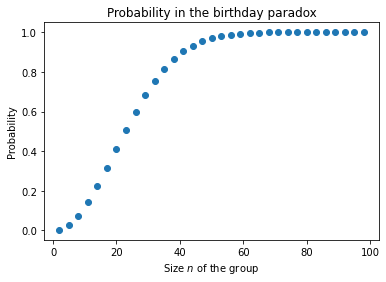

-----------------
Question 2
For n = 31, we have 0.7304546337286439 chance of 2 identical birthdays
For n = 32, we have 0.7533475278503206 chance of 2 identical birthdays
-----------------


In [14]:
# Question 1
BirthdayParadox = [TwoIdenticalBirthdays(n,365) for n in range(2,100,3)]
plt.plot(range(2,100,3),BirthdayParadox,'o')
plt.xlabel('Size $n$ of the group'),plt.ylabel('Probability')
plt.title('Probability in the birthday paradox')
plt.show()

# Question 2

BirthdayParadox = [TwoIdenticalBirthdays(n,365) for n in range(1,365)]
i=1
while BirthdayParadox[i]<0.75:
    i=i+1
print('-----------------')
print('Question 2')
print('For n = '+str(i)+', we have '+str(TwoIdenticalBirthdays(i,365))+' chance of 2 identical birthdays')
print('For n = '+str(i+1)+', we have '+str(TwoIdenticalBirthdays(i+1,365))+' chance of 2 identical birthdays')
print('-----------------')


<div markdown=1 class="Answers"> 
2) According to the above script, there are more than $75$% chances as soon as $n\geq 32$.